In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import sklearn
import matplotlib.pyplot as plt


In [1]:
# Download the dataset
!wget -O FuelConsumption.csv https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ML0101EN-SkillsNetwork/labs/Module%202/data/FuelConsumptionCo2.csv

--2021-08-25 06:03:30--  https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ML0101EN-SkillsNetwork/labs/Module%202/data/FuelConsumptionCo2.csv
Resolving cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud (cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud)... 169.63.118.104
Connecting to cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud (cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud)|169.63.118.104|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 72629 (71K) [text/csv]
Saving to: ‘FuelConsumption.csv’

FuelConsumption.csv 100%[===================>]  70.93K  --.-KB/s    in 0.002s  

2021-08-25 06:03:30 (29.9 MB/s) - ‘FuelConsumption.csv’ saved [72629/72629]



In [4]:
df=pd.read_csv("FuelConsumption.csv")
df.head()

,MODELYEAR,MAKE,MODEL,VEHICLECLASS,ENGINESIZE,CYLINDERS,TRANSMISSION,FUELTYPE,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
0,2014,ACURA,ILX,COMPACT,2.0,4,AS5,Z,9.9,6.7,8.5,33,196
1,2014,ACURA,ILX,COMPACT,2.4,4,M6,Z,11.2,7.7,9.6,29,221
2,2014,ACURA,ILX HYBRID,COMPACT,1.5,4,AV7,Z,6.0,5.8,5.9,48,136
3,2014,ACURA,MDX 4WD,SUV - SMALL,3.5,6,AS6,Z,12.7,9.1,11.1,25,255
4,2014,ACURA,RDX AWD,SUV - SMALL,3.5,6,AS6,Z,12.1,8.7,10.6,27,244


In [9]:
#Finding the data types of each coloumn
df.dtypes

MODELYEAR                     int64
MAKE                         object
MODEL                        object
VEHICLECLASS                 object
ENGINESIZE                  float64
CYLINDERS                     int64
TRANSMISSION                 object
FUELTYPE                     object
FUELCONSUMPTION_CITY        float64
FUELCONSUMPTION_HWY         float64
FUELCONSUMPTION_COMB        float64
FUELCONSUMPTION_COMB_MPG      int64
CO2EMISSIONS                  int64
dtype: object

In [10]:
# changing the datatype of FUELCONSUMPTION_CITY to int
df['FUELCONSUMPTION_CITY']=df['FUELCONSUMPTION_CITY'].astype('int')

In [11]:
# changing the datatype of FUELCONSUMPTION_COMB_MPG  to float
df['FUELCONSUMPTION_COMB_MPG']=df['FUELCONSUMPTION_COMB_MPG'].astype('float')

In [12]:
#checking the datatypes
df.dtypes

MODELYEAR                     int64
MAKE                         object
MODEL                        object
VEHICLECLASS                 object
ENGINESIZE                  float64
CYLINDERS                     int64
TRANSMISSION                 object
FUELTYPE                     object
FUELCONSUMPTION_CITY          int64
FUELCONSUMPTION_HWY         float64
FUELCONSUMPTION_COMB        float64
FUELCONSUMPTION_COMB_MPG    float64
CO2EMISSIONS                  int64
dtype: object

In [13]:
df.head()

,MODELYEAR,MAKE,MODEL,VEHICLECLASS,ENGINESIZE,CYLINDERS,TRANSMISSION,FUELTYPE,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
0,2014,ACURA,ILX,COMPACT,2.0,4,AS5,Z,9,6.7,8.5,33.0,196
1,2014,ACURA,ILX,COMPACT,2.4,4,M6,Z,11,7.7,9.6,29.0,221
2,2014,ACURA,ILX HYBRID,COMPACT,1.5,4,AV7,Z,6,5.8,5.9,48.0,136
3,2014,ACURA,MDX 4WD,SUV - SMALL,3.5,6,AS6,Z,12,9.1,11.1,25.0,255
4,2014,ACURA,RDX AWD,SUV - SMALL,3.5,6,AS6,Z,12,8.7,10.6,27.0,244


In [27]:
#To remove the column  
df.drop(['ENGINESIZE'],axis=1,inplace=False)
#if implace=True it will remove the column and update it to the data frame.

,MODELYEAR,MAKE,MODEL,VEHICLECLASS,CYLINDERS,TRANSMISSION,FUELTYPE,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
0,2014,ACURA,ILX,COMPACT,4,AS5,Z,9,6.7,8.5,33.0,196
1,2014,ACURA,ILX,COMPACT,4,M6,Z,11,7.7,9.6,29.0,221
2,2014,ACURA,ILX HYBRID,COMPACT,4,AV7,Z,6,5.8,5.9,48.0,136
3,2014,ACURA,MDX 4WD,SUV - SMALL,6,AS6,Z,12,9.1,11.1,25.0,255
4,2014,ACURA,RDX AWD,SUV - SMALL,6,AS6,Z,12,8.7,10.6,27.0,244
...,...,...,...,...,...,...,...,...,...,...,...,...
1062,2014,VOLVO,XC60 AWD,SUV - SMALL,6,AS6,X,13,9.8,11.8,24.0,271
1063,2014,VOLVO,XC60 AWD,SUV - SMALL,6,AS6,X,13,9.5,11.5,25.0,264
1064,2014,VOLVO,XC70 AWD,SUV - SMALL,6,AS6,X,13,9.8,11.8,24.0,271
1065,2014,VOLVO,XC70 AWD,SUV - SMALL,6,AS6,X,12,9.3,11.3,25.0,260


In [29]:
#finding z score of the column
df['FUELCONSUMPTION_CITY']=(df['FUELCONSUMPTION_CITY']-df['FUELCONSUMPTION_CITY'].mean())/df['FUELCONSUMPTION_CITY'].std()
df['FUELCONSUMPTION_CITY']

0      -0.931532
1      -0.446917
2      -1.658454
3      -0.204610
4      -0.204610
          ...   
1062    0.037697
1063    0.037697
1064    0.037697
1065   -0.204610
1066    0.280005
Name: FUELCONSUMPTION_CITY, Length: 1067, dtype: float64

In [34]:
#finding Z-score for the dataframe
df1=(df-df.mean())/df.std()
df1.head()
#you get NaN because the columns are not the int datatype.

,CO2EMISSIONS,CYLINDERS,ENGINESIZE,FUELCONSUMPTION_CITY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,FUELCONSUMPTION_HWY,FUELTYPE,MAKE,MODEL,MODELYEAR,TRANSMISSION,VEHICLECLASS
0,-0.950394,-0.998500,-0.950846,-0.931532,-0.883890,0.878141,-0.992876,NaN,NaN,NaN,NaN,NaN,NaN
1,-0.555900,-0.998500,-0.668339,-0.446917,-0.568305,0.342573,-0.635031,NaN,NaN,NaN,NaN,NaN,NaN
2,-1.897180,-0.998500,-1.303979,-1.658454,-1.629817,2.886522,-1.314936,NaN,NaN,NaN,NaN,NaN,NaN
3,-0.019388,0.114189,0.108555,-0.204610,-0.137962,-0.192995,-0.134049,NaN,NaN,NaN,NaN,NaN,NaN
4,-0.192966,0.114189,0.108555,-0.204610,-0.281410,0.074789,-0.277187,NaN,NaN,NaN,NaN,NaN,NaN


In [42]:
#Binning in python
bins=np.linspace(min(df['CO2EMISSIONS']),max(df['CO2EMISSIONS']),4)
group_names=['Low','Medium','High']
df['EMISSIONS_binned']=pd.cut(df['CO2EMISSIONS'],bins,labels=group_names,include_lowest=True)

In [44]:
df['EMISSIONS_binned'].value_counts()

Medium    557
Low       435
High       75
Name: EMISSIONS_binned, dtype: int64

<function matplotlib.pyplot.plot>

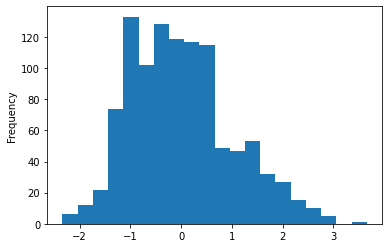

In [45]:
#Using Histogram
df['CO2EMISSIONS'].plot(kind='hist',x='CO2EMISSIONS',bins=20)
plt.plot

In [64]:
mylabels=df['ENGINESIZE'].values